<a href="https://colab.research.google.com/github/bhragu77/ML_supervised_Basics/blob/main/SuperVised_Learning_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [11]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]

df = pd.read_csv("magic04.data" , names = cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [12]:
df["class"] = (df["class"] == "g").astype(int)

In [13]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


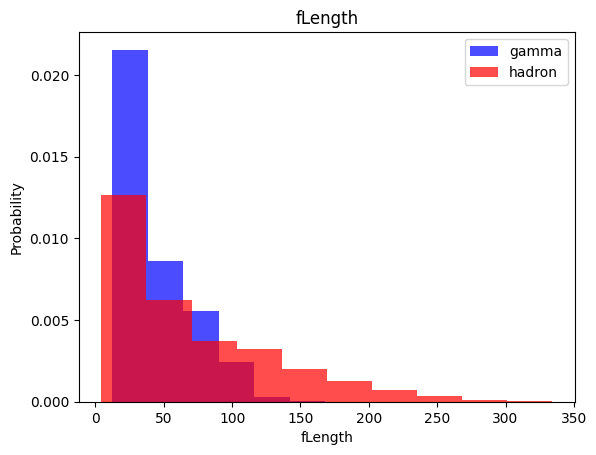

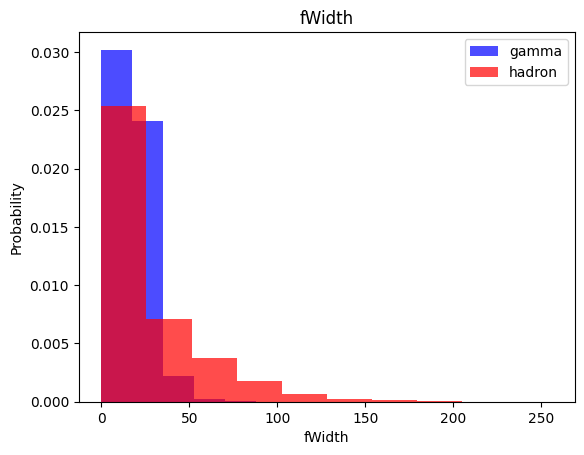

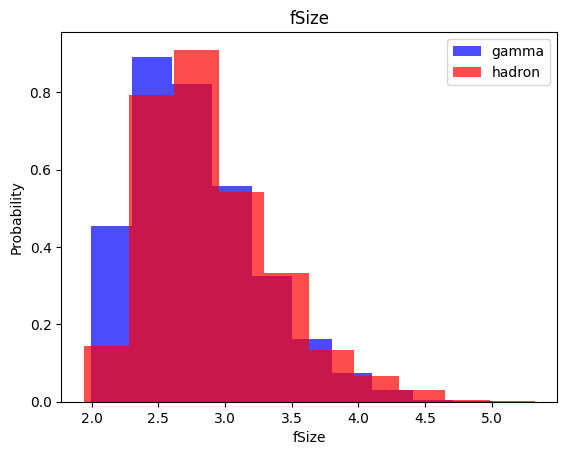

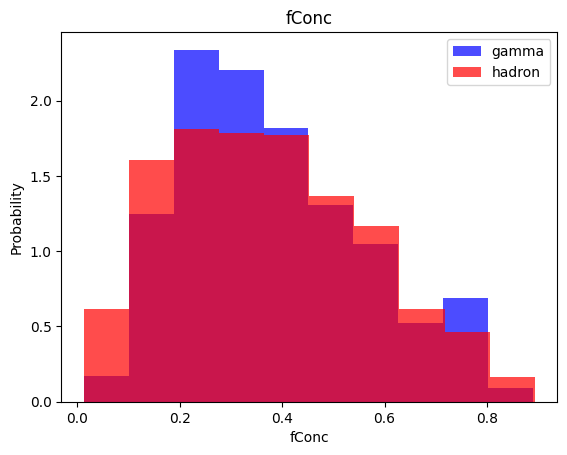

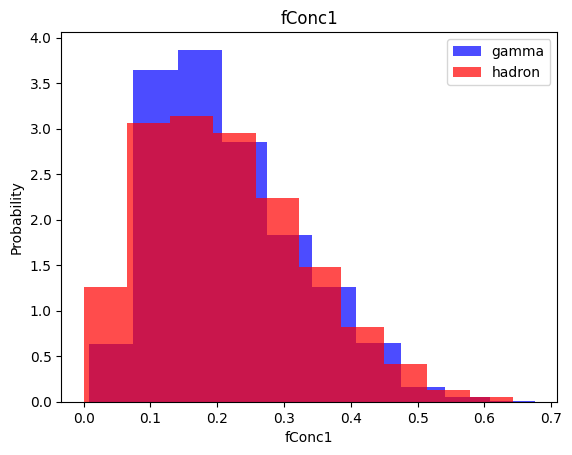

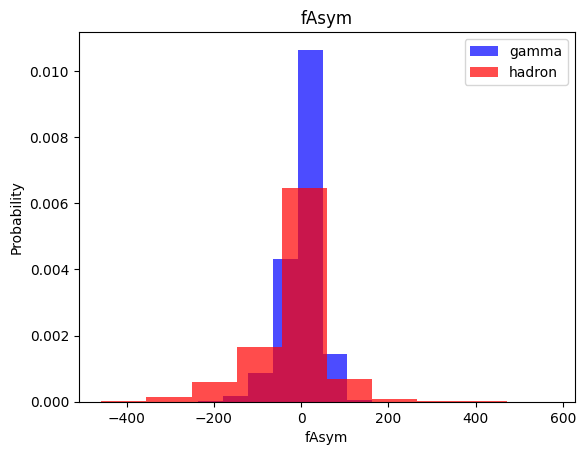

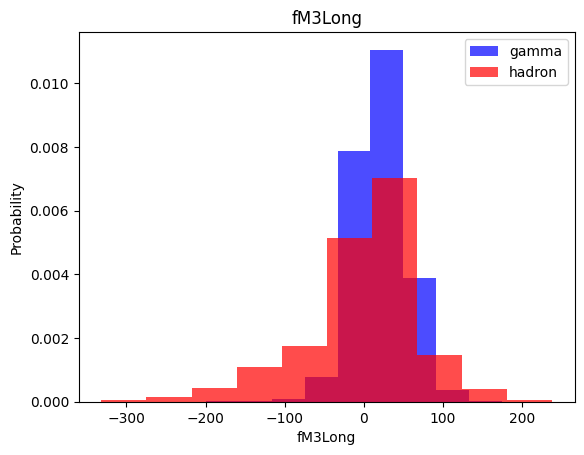

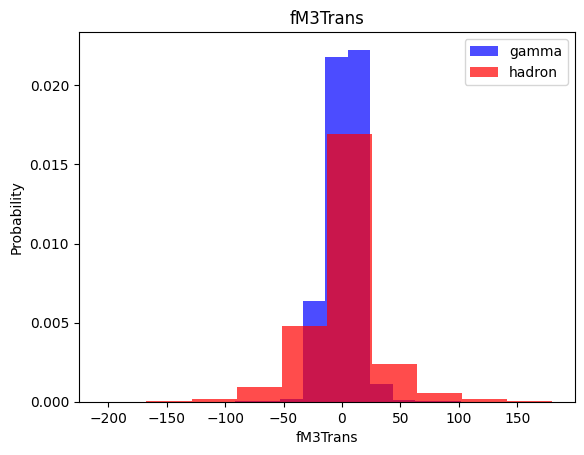

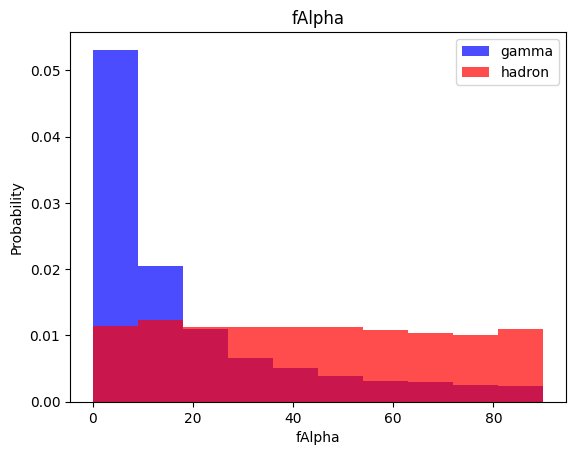

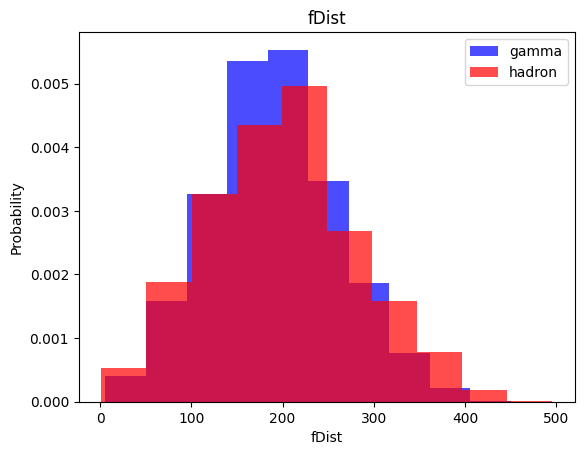

In [14]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

VALIDATION TEST SET  , TRAINING SET  , TESTING DATASET

In [15]:
train , valid , test = np.split(df.sample(frac = 1) , [int(0.6*len(df)) , int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [16]:
def scale_dataset(dataframe , oversample = False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X,y = ros.fit_resample(X,y)
  data = np.hstack((X,np.reshape(y , (-1,1))))

  return data,X,y


In [17]:
train , X_train , y_train = scale_dataset(train , oversample=True)
valid , X_valid , y_valid = scale_dataset(valid , oversample=True)
test , X_test , y_test = scale_dataset(test , oversample=True)



KN IMPLEMENTATION


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


In [19]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train  , y_train)

KNeighborsClassifier()

In [20]:
y_pred = knn_model.predict(X_test)

In [21]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79      2467
           1       0.77      0.85      0.81      2467

    accuracy                           0.80      4934
   macro avg       0.80      0.80      0.80      4934
weighted avg       0.80      0.80      0.80      4934



Naive Bayes


In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
nb_model = GaussianNB()
nb_model.fit(X_train , y_train)

GaussianNB()

In [24]:
y_pred  = nb_model.predict(X_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.81      0.41      0.54      2467
           1       0.60      0.90      0.72      2467

    accuracy                           0.66      4934
   macro avg       0.71      0.66      0.63      4934
weighted avg       0.71      0.66      0.63      4934



**logistic Regression**

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train , y_train)

In [27]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      2467
           1       0.75      0.83      0.79      2467

    accuracy                           0.78      4934
   macro avg       0.78      0.78      0.78      4934
weighted avg       0.78      0.78      0.78      4934



***SVM***

In [28]:
from sklearn.svm import SVC

In [29]:
svm_model = SVC()
svm_model = svm_model.fit(X_train , y_train)

In [30]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      2467
           1       0.82      0.90      0.86      2467

    accuracy                           0.85      4934
   macro avg       0.85      0.85      0.85      4934
weighted avg       0.85      0.85      0.85      4934



***Tensorflow Neural Networks
***

In [31]:
import tensorflow as tf

In [32]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [33]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


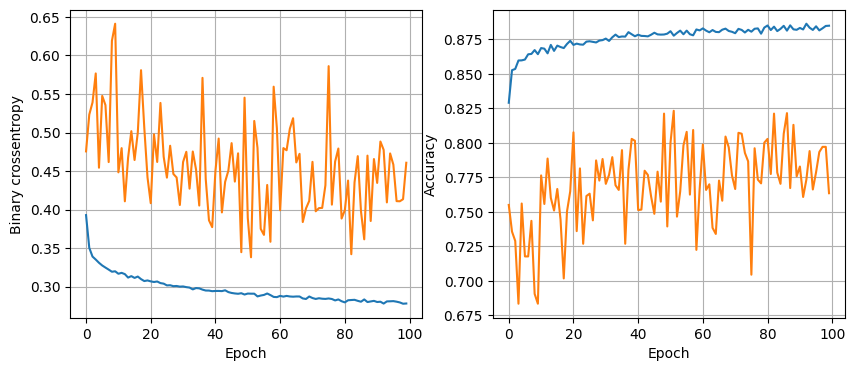

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8613 - loss: 0.3375
16 nodes, dropout 0, lr 0.01, batch size 64


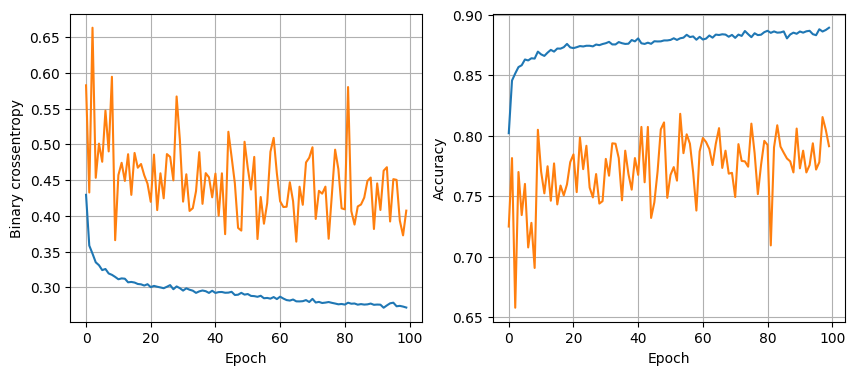

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8658 - loss: 0.3333
16 nodes, dropout 0, lr 0.01, batch size 128


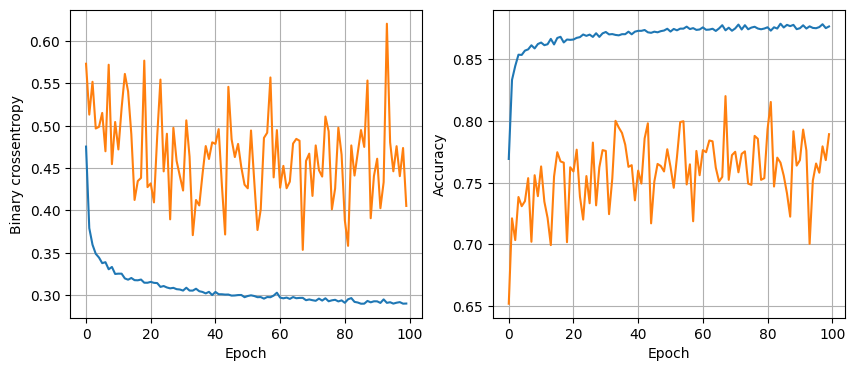

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8756 - loss: 0.3268
16 nodes, dropout 0, lr 0.005, batch size 32


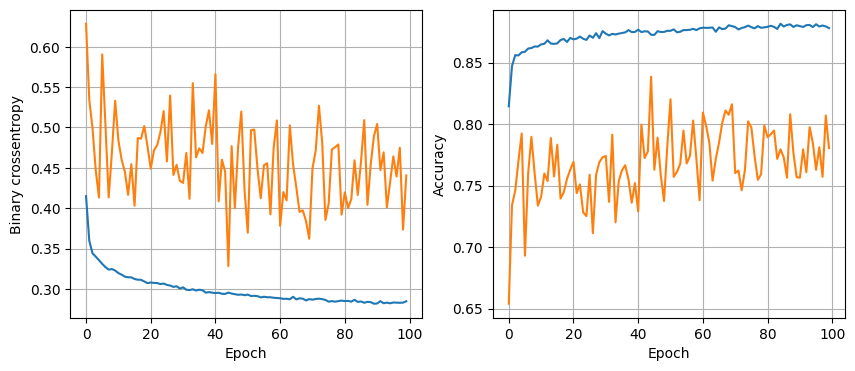

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8602 - loss: 0.3550
16 nodes, dropout 0, lr 0.005, batch size 64


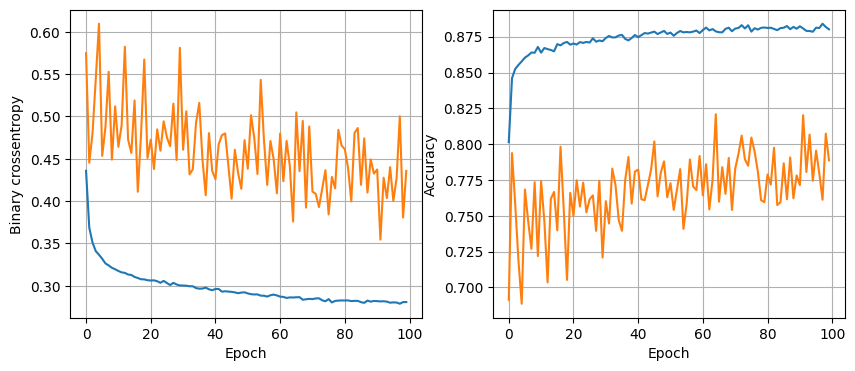

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8640 - loss: 0.3328
16 nodes, dropout 0, lr 0.005, batch size 128


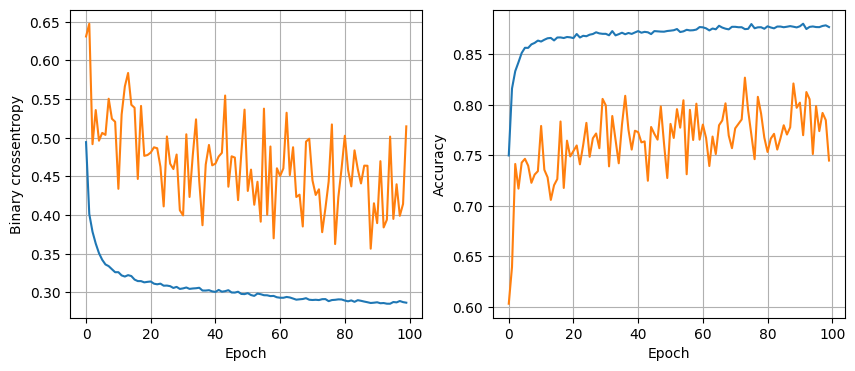

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8677 - loss: 0.3274
16 nodes, dropout 0, lr 0.001, batch size 32


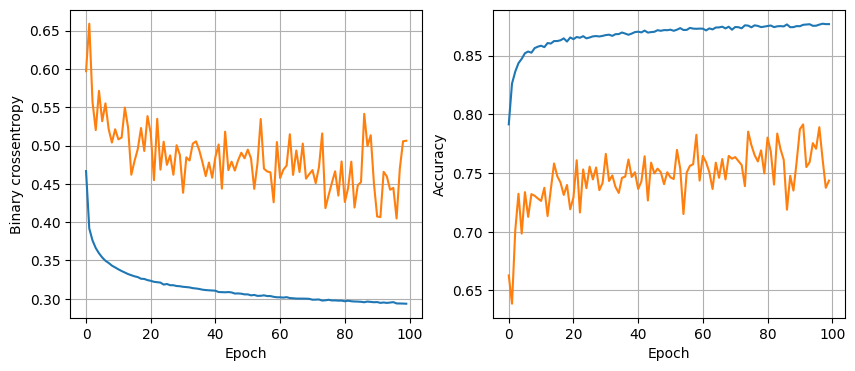

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8675 - loss: 0.3222
16 nodes, dropout 0, lr 0.001, batch size 64


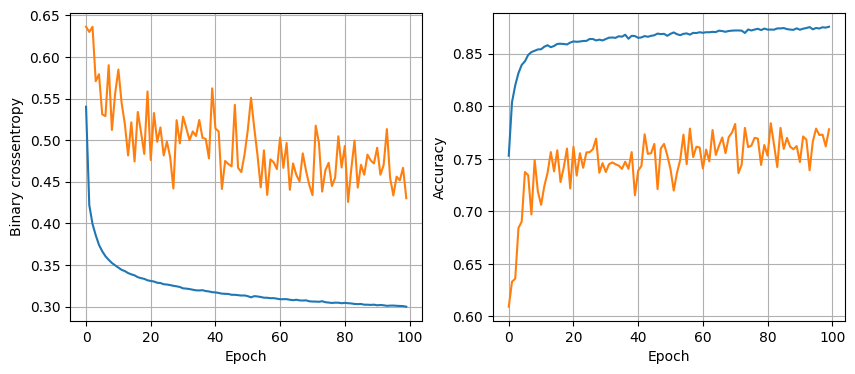

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8691 - loss: 0.3216
16 nodes, dropout 0, lr 0.001, batch size 128


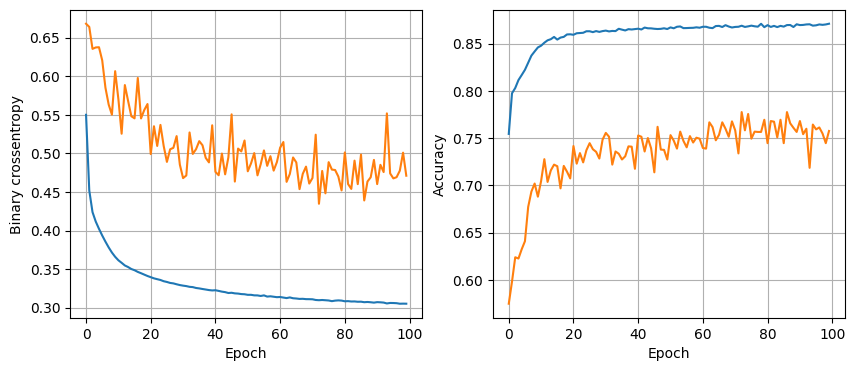

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8604 - loss: 0.3279
16 nodes, dropout 0.2, lr 0.01, batch size 32


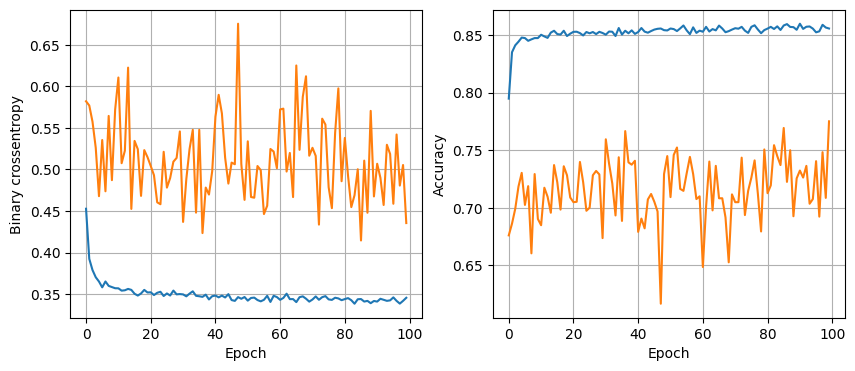

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8675 - loss: 0.3275
16 nodes, dropout 0.2, lr 0.01, batch size 64


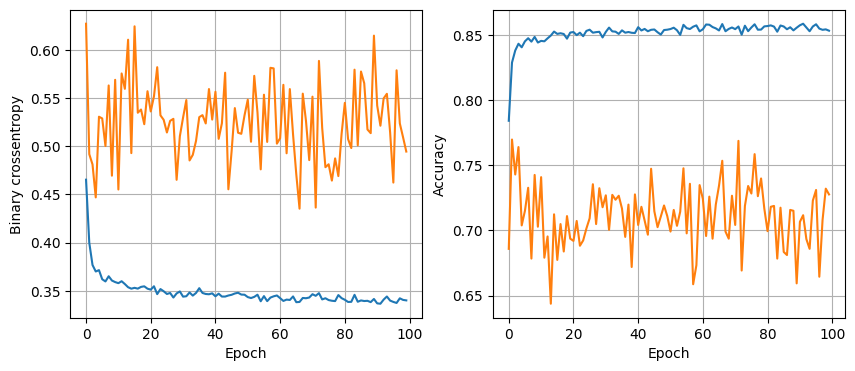

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8629 - loss: 0.3260
16 nodes, dropout 0.2, lr 0.01, batch size 128


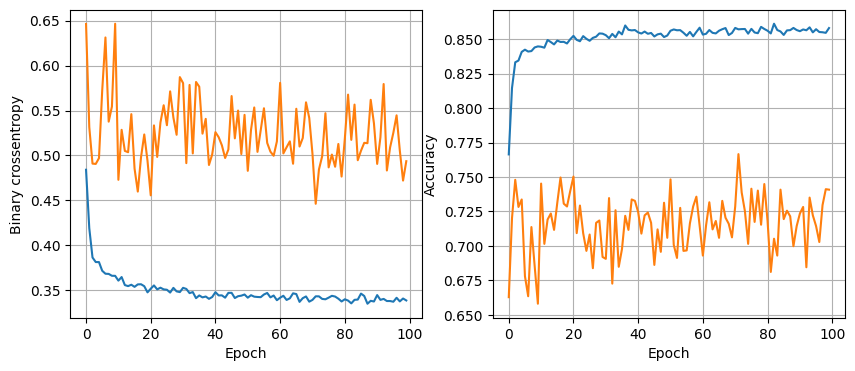

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8623 - loss: 0.3148
16 nodes, dropout 0.2, lr 0.005, batch size 32


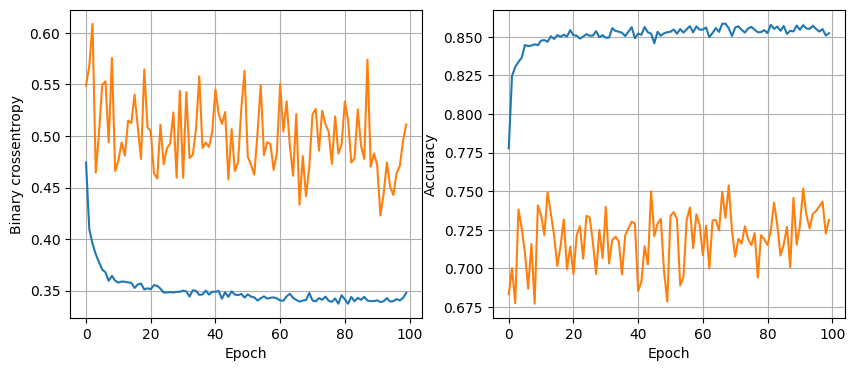

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8663 - loss: 0.3245
16 nodes, dropout 0.2, lr 0.005, batch size 64


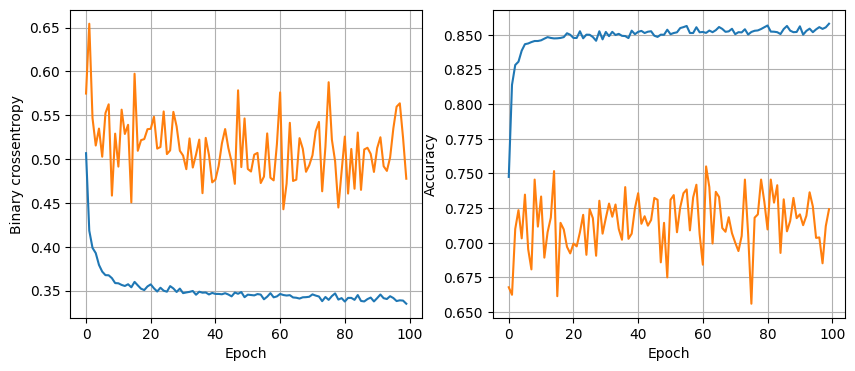

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8626 - loss: 0.3281
16 nodes, dropout 0.2, lr 0.005, batch size 128


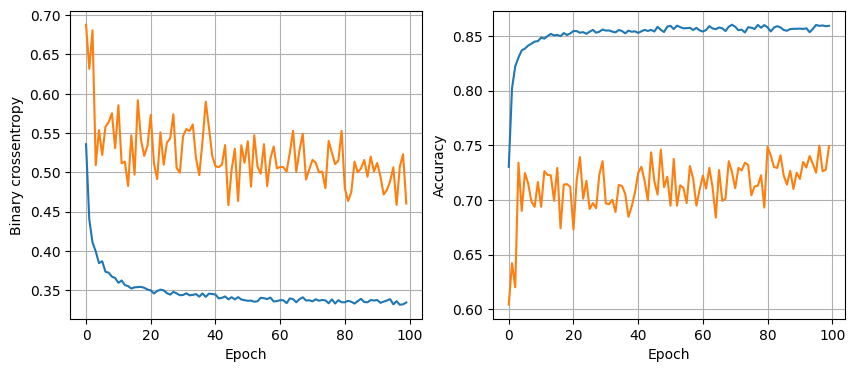

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8649 - loss: 0.3252
16 nodes, dropout 0.2, lr 0.001, batch size 32


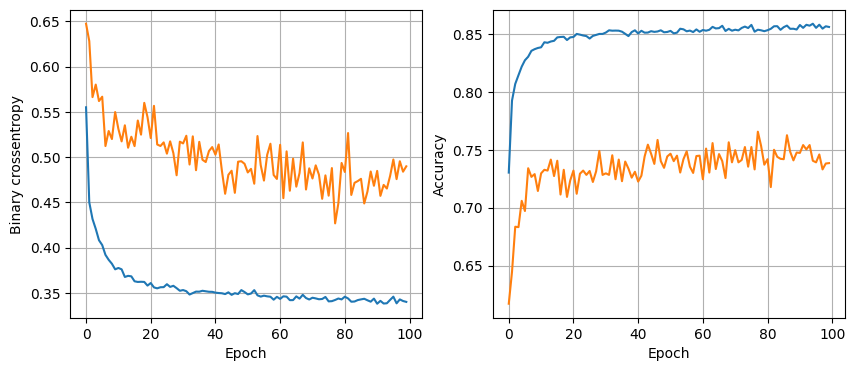

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8660 - loss: 0.3238
16 nodes, dropout 0.2, lr 0.001, batch size 64


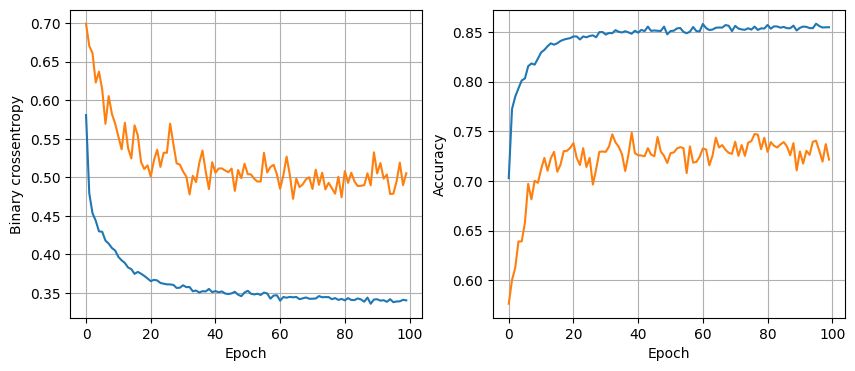

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8612 - loss: 0.3227
16 nodes, dropout 0.2, lr 0.001, batch size 128


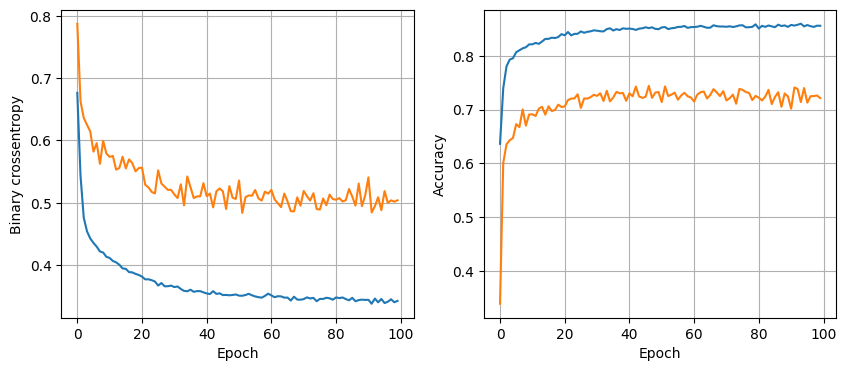

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8603 - loss: 0.3220
32 nodes, dropout 0, lr 0.01, batch size 32


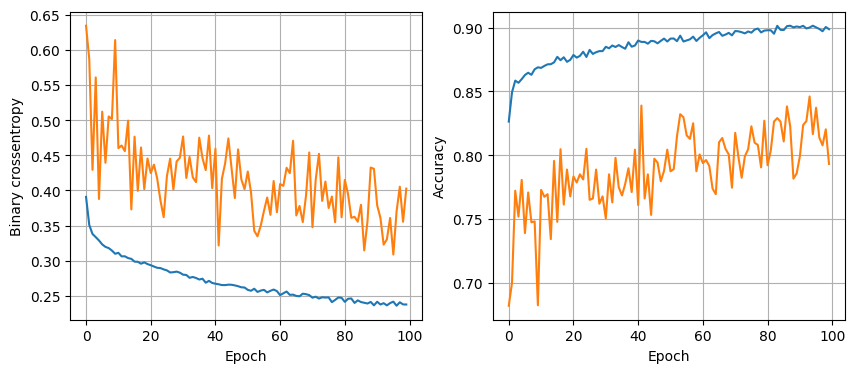

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8569 - loss: 0.4012
32 nodes, dropout 0, lr 0.01, batch size 64


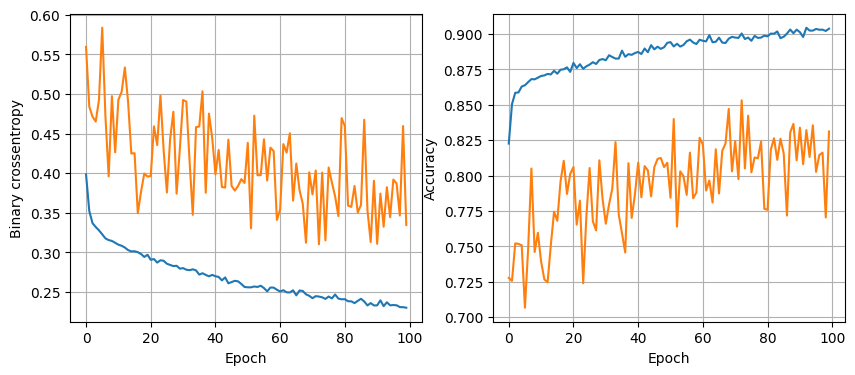

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8446 - loss: 0.4257
32 nodes, dropout 0, lr 0.01, batch size 128


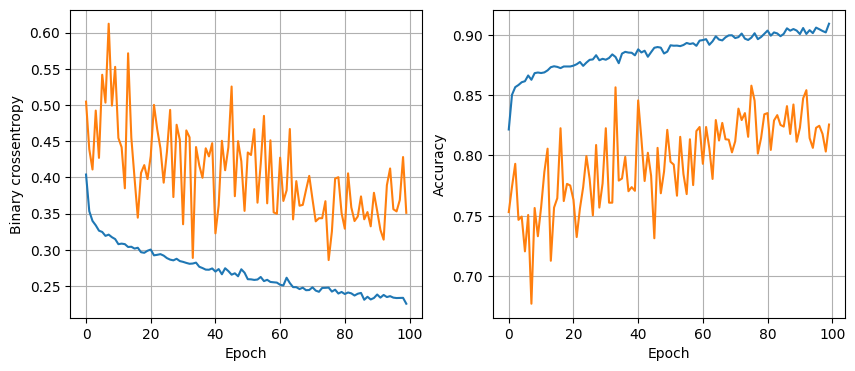

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8599 - loss: 0.4008
32 nodes, dropout 0, lr 0.005, batch size 32


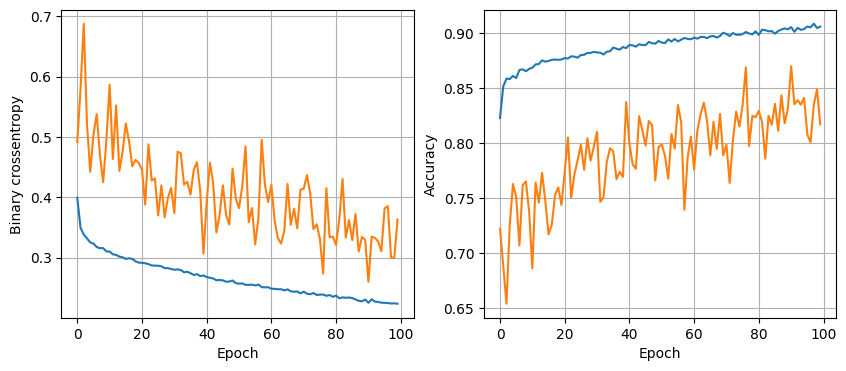

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8628 - loss: 0.3971
32 nodes, dropout 0, lr 0.005, batch size 64


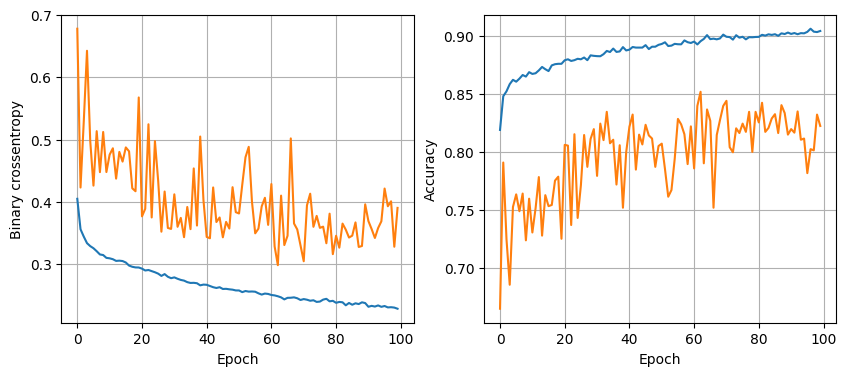

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8586 - loss: 0.4104
32 nodes, dropout 0, lr 0.005, batch size 128


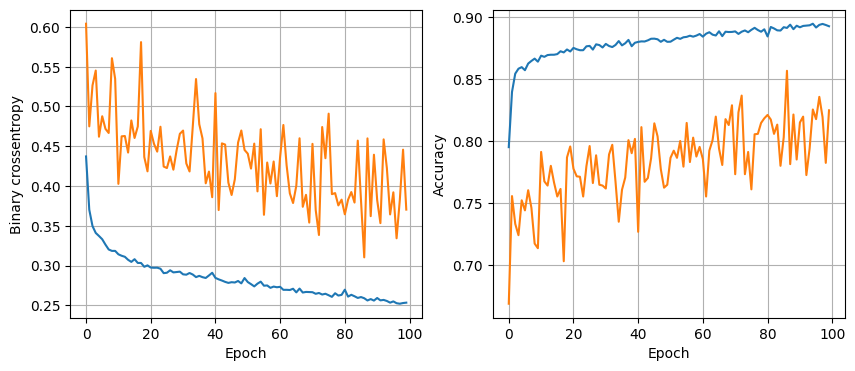

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8601 - loss: 0.3667
32 nodes, dropout 0, lr 0.001, batch size 32


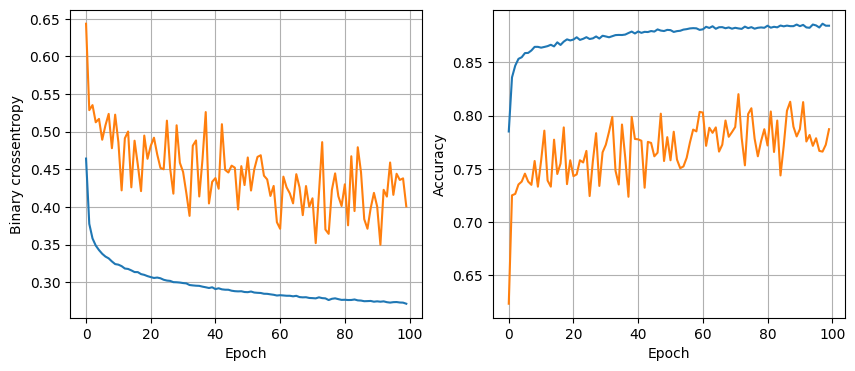

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8666 - loss: 0.3343
32 nodes, dropout 0, lr 0.001, batch size 64


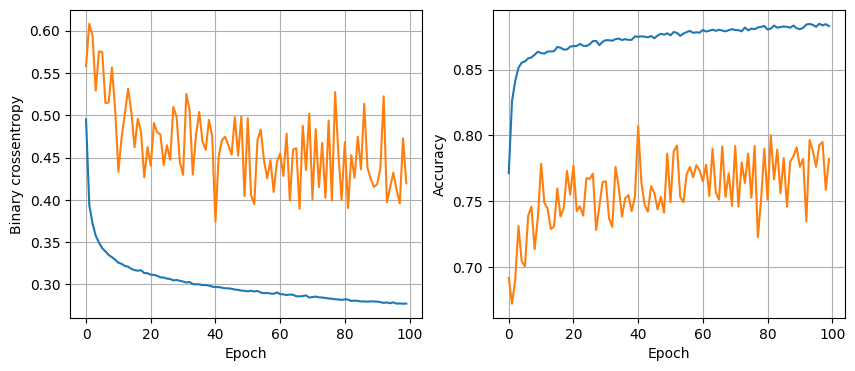

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8691 - loss: 0.3294
32 nodes, dropout 0, lr 0.001, batch size 128


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
           least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)